In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Our year

In [5]:
day_0 = pd.read_csv("prices_round_3_day_0.csv", sep=";")
day_1 = pd.read_csv("prices_round_3_day_1.csv", sep=";")
day_2 = pd.read_csv("prices_round_3_day_2.csv", sep=";")
df = pd.concat([day_0, day_1, day_2])
df['timestamp'] += 1000000 * df['day']

In [6]:
df['product'].unique()

array(['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET'], dtype=object)

In [7]:
bask = df[df['product'] == 'GIFT_BASKET']
choc = df[df['product'] == 'CHOCOLATE']
rose = df[df['product'] == 'ROSES']
straw = df[df['product'] == 'STRAWBERRIES']

In [ ]:
corr_m = pd.DataFrame({
    'bask': bask['mid_price'].values,
    'choc': choc['mid_price'].values,
    'rose': rose['mid_price'].values,
    'straw': straw['mid_price'].values,
})
corr_m.corr()


,bask,choc,rose,straw
bask,1.000000,0.947339,0.850830,0.498003
choc,0.947339,1.000000,0.826358,0.273545
rose,0.850830,0.826358,1.000000,0.148667
straw,0.498003,0.273545,0.148667,1.000000


### Basket - Choc and Basket - Rose possible pair

In [ ]:
### First Basket - Choc
bask = corr_m['bask']
choc = corr_m['choc']

In [ ]:
bask

NameError: name 'bask' is not defined

In [31]:
from statsmodels.tsa.stattools import adfuller
r1 = adfuller(bask)
print('P value for the Augmented Dickey-Fuller Test is', r1[1])
r2 = adfuller(choc)
print('P value for the Augmented Dickey-Fuller Test is', r2[1])
r3 = adfuller(bask - choc)
print('P value for the Augmented Dickey-Fuller Test is', r3[1])
r4 = adfuller(bask / choc)
print('P value for the Augmented Dickey-Fuller Test is', r4[1])

P value for the Augmented Dickey-Fuller Test is 0.8730762888107039
P value for the Augmented Dickey-Fuller Test is 0.9255847057229258
P value for the Augmented Dickey-Fuller Test is 0.8278144545270432
P value for the Augmented Dickey-Fuller Test is 0.32285426093332903


(8.813397129186603, 9.031387522650789, 8.933633868419538, 8.939821016465391)

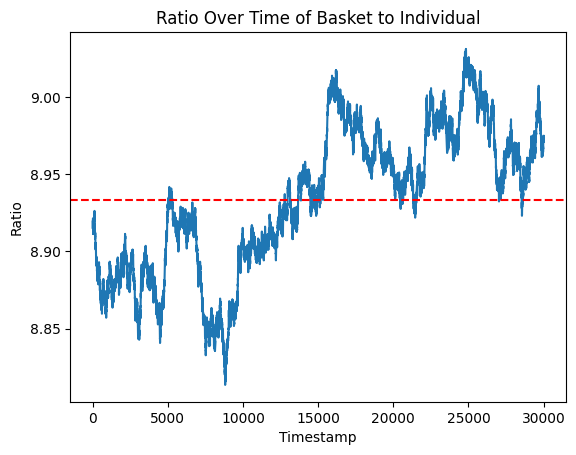

In [34]:
ratio = bask / choc
fig, ax1 = plt.subplots()
sns.lineplot(data=ratio, ax=ax1)
ax1.axhline(y=ratio.mean(), color='r', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Ratio')
plt.title('Ratio Over Time of Basket to Individual')
ratio.min(), ratio.max(), ratio.mean(), ratio.median()

In [32]:
### Basket - Rose
bask = corr_m['bask']
rose = corr_m['rose']
r1 = adfuller(bask)
print('P value for the Augmented Dickey-Fuller Test is', r1[1])
r2 = adfuller(rose)
print('P value for the Augmented Dickey-Fuller Test is', r2[1])
r3 = adfuller(bask - rose)
print('P value for the Augmented Dickey-Fuller Test is', r3[1])
r4 = adfuller(bask / rose)
print('P value for the Augmented Dickey-Fuller Test is', r4[1])

P value for the Augmented Dickey-Fuller Test is 0.8730762888107039
P value for the Augmented Dickey-Fuller Test is 0.03497874247792111
P value for the Augmented Dickey-Fuller Test is 0.9009575871863165
P value for the Augmented Dickey-Fuller Test is 0.0014912660171517472


(4.756308123062564, 4.944577726782796, 4.874359710325611, 4.880006933479754)

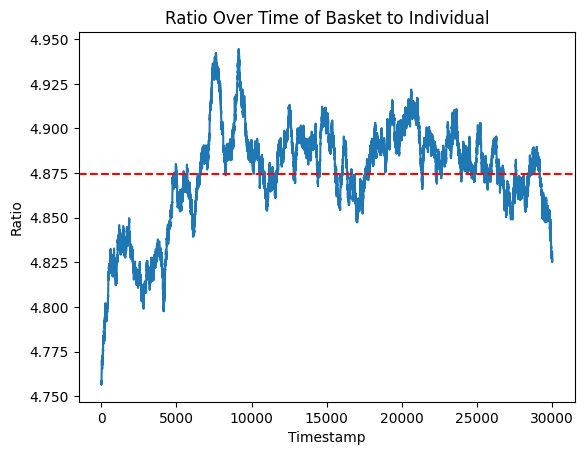

In [33]:
ratio = bask / rose
fig, ax1 = plt.subplots()
sns.lineplot(data=ratio, ax=ax1)
ax1.axhline(y=ratio.mean(), color='r', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Ratio')
plt.title('Ratio Over Time of Basket to Individual')
ratio.min(), ratio.max(), ratio.mean(), ratio.median()

### The tests are kinda against it. Rose - Choc appears to be the strongest pair

In [37]:
from statsmodels.tsa.stattools import adfuller
r1 = adfuller(rose)
print('P value for the Augmented Dickey-Fuller Test is', r1[1])
r2 = adfuller(choc)
print('P value for the Augmented Dickey-Fuller Test is', r2[1])
r3 = adfuller(rose - choc)
print('P value for the Augmented Dickey-Fuller Test is', r3[1])
r4 = adfuller(rose / choc)
print('P value for the Augmented Dickey-Fuller Test is', r4[1])

P value for the Augmented Dickey-Fuller Test is 0.03497874247792111
P value for the Augmented Dickey-Fuller Test is 0.9255847057229258
P value for the Augmented Dickey-Fuller Test is 0.0005494267376495958
P value for the Augmented Dickey-Fuller Test is 0.012781205783048394


(1.789307200893134, 1.875, 1.8328332608080198, 1.8342198581560283)

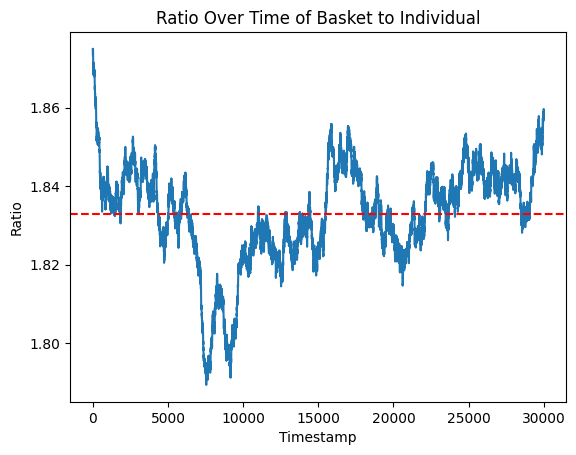

In [38]:
ratio = rose / choc
fig, ax1 = plt.subplots()
sns.lineplot(data=ratio, ax=ax1)
ax1.axhline(y=ratio.mean(), color='r', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Ratio')
plt.title('Ratio Over Time of Basket to Individual')
ratio.min(), ratio.max(), ratio.mean(), ratio.median()